In [1]:
import xarray as xr
import numpy as np
from dask.distributed import Client
from mom6.mom6_module import mom6_io

In [2]:
### open local cluster
client = Client(processes=False)
print(client)
print(client.cluster.dashboard_link)

<Client: 'inproc://10.173.16.4/678717/1' processes=1 threads=96, memory=0.98 TiB>
http://10.173.16.4:8787/status


In [5]:
histrun_raw = mom6_io.MOM6Historical(
    var='chlos',
    data_relative_dir='hist_run/',
    static_relative_dir='static/',
    grid='raw',
    source='local')

histrun_regrid = mom6_io.MOM6Historical(
    var='chlos',
    data_relative_dir='hist_run/regrid/',
    static_relative_dir='static/',
    grid='regrid',
    source='local')

In [6]:
ds_raw = histrun_raw.get_single(year=1994,month=3)
ds_regrid = histrun_regrid.get_single(year=1994,month=3)

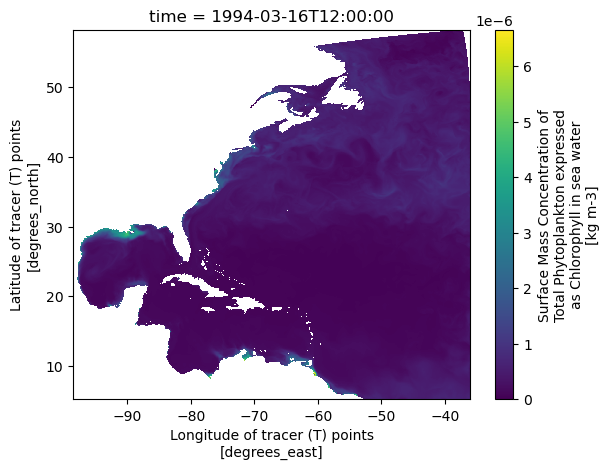

In [9]:
ds_raw.chlos.plot(x='geolon',y='geolat')

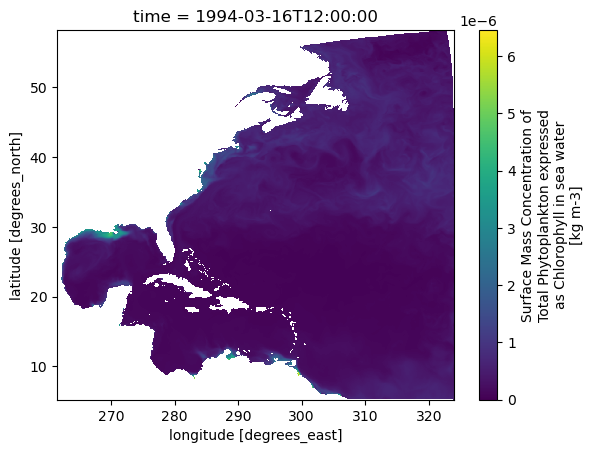

In [10]:
ds_regrid.chlos.plot(x='lon',y='lat')

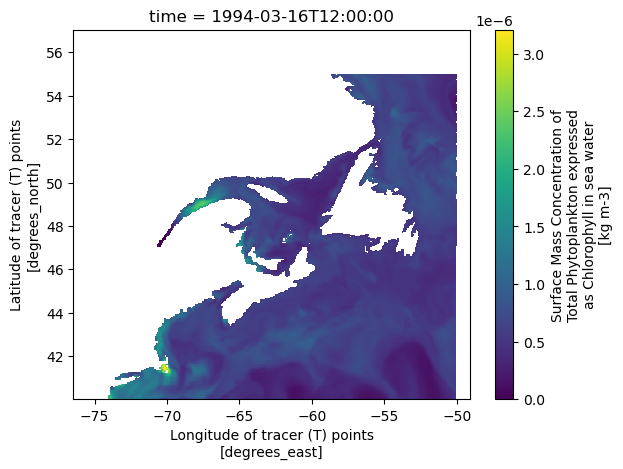

In [16]:
ds_raw.chlos.where(
    (ds_raw.geolon>-75)&
    (ds_raw.geolon<-50)&
    (ds_raw.geolat>40)&
    (ds_raw.geolat<55),
    drop=True
).plot(x='geolon',y='geolat')

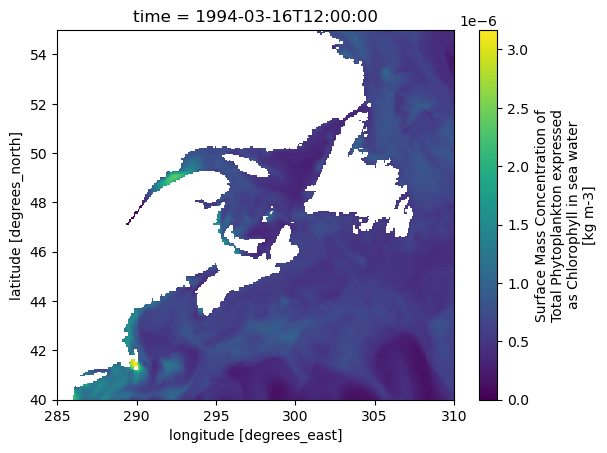

In [17]:
ds_regrid.chlos.where(
    (ds_regrid.lon>-75+360)&
    (ds_regrid.lon<-50+360)&
    (ds_regrid.lat>40)&
    (ds_regrid.lat<55),
    drop=True
).plot(x='lon',y='lat')